---
# Optional: 


- How many particles to obtain stable results?
- More tests of lineariry and area preservation of our transport matrices

---

##### First, Let's import standard packages and settings...

In [1]:
# Import custom tracking functions and useful libraries
from tracking_library import *

# Set up plotting
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Exercise 2.1Ph

Explore the dependence of the statistical error with on the beam divergence by a numerical simulation:
- Generate $N$ particle coordinates, for varying $N$ (e.g. [10, 100, 1000, 10000, ...]), with some offset/divergence spread 
   (e.g.  $<x> = 0.2$, $<x'> = 1$, $\sigma_{x} = 1.5$, $\sigma_{x'} = 0.5$)
- Compute the particle distribution angular divergence for each $N$
- Show, e.g. visually with a plot, that only for high $N$ one obtains a divergence which is "close" to the input 

**Hint:** Remember that you can create a Normal distributed 2xN 2D array of numbers as `np.random.randn(2, N)`. One can then "stretch" and "offset" (and eventually "rotate", but this is not requested here) this distribution to obtain any desired 2D normal distribution in phase space.

Text(0, 0.5, 'Beam divergence of the ensemble')

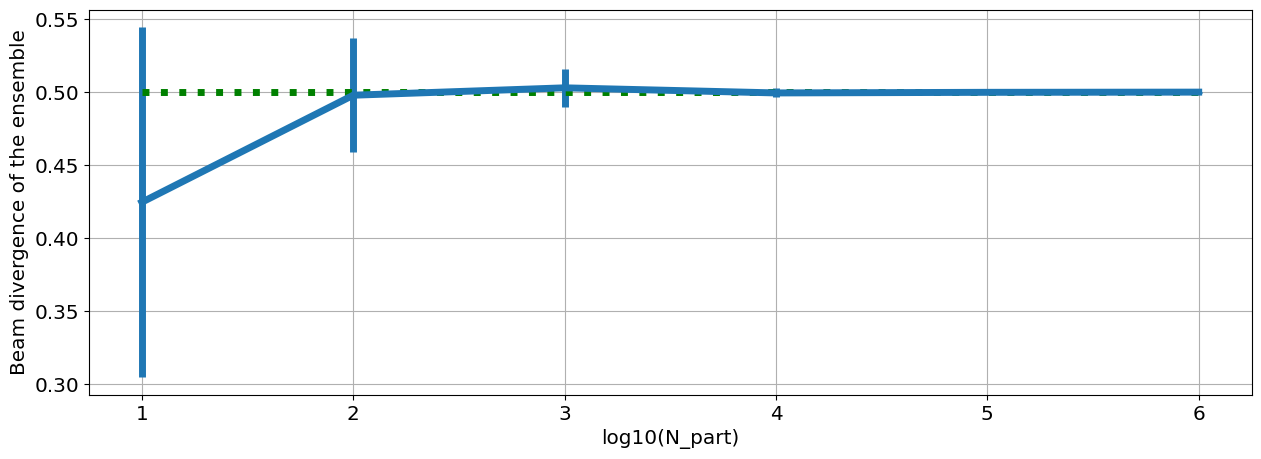

In [2]:
# Input values
x0 = 0.2
xp0 = 1
sigx = 1.5
sigxp = 0.5

# Let's collect mean diverge of particle distribution in lists
myDivergence = []
myDivergenceStatisticalError = []
# generate number of particles array in some way...
Npart_range = np.round(np.logspace(1,6,num=6))
Npart_range = Npart_range.astype(int)
for Npart in Npart_range:
    aux = []
    for j in range(10):
        beam = np.random.randn(2, Npart)
        beam[0,:] = sigx*beam[0,:]+x0
        beam[1,:] = sigxp*beam[1,:]+xp0
        aux.append(np.std(beam[1,:]))
    myDivergence.append(np.mean(aux))
    myDivergenceStatisticalError.append(np.std(aux))
plt.errorbar(np.log10(Npart_range),myDivergence,myDivergenceStatisticalError,lw=5)
plt.plot([1,6],[sigxp,sigxp],':g',lw=5)
plt.grid(True)
plt.xlabel('log10(N_part)')
plt.ylabel('Beam divergence of the ensemble')


> **Depending on the required precision we need to select a convenient number of particles to model our beams!**

### Exercise 2.2Ph

1. Transport the beam distribution of [Exercise 12](#exercise-12-guided) in a drift of length 1 m. Visualise the initial and final distribution. What do you observe?

   **Hint:** One can use the `seaborn` package to nicely see a 2D distribution, e.g.:
   ```
   import seaborn as sns
   sns.jointplot(x=np.random.randn(1000), y=np.random.randn(1000), kind="hex", color="b")
   ```

3. Test of linearity.  Scale the input vector by 17 times the month of your birthday (e.g. 85 if you are born in May) and verify that the output vector from the matrix multiplication has changed by the same factor.
    
    **Hint:** Be careful with machine precision!

4. Consider 3 particles (e.g. the first 3 of your ensample) such that they define a triangle of surface A. Verify that this linear transport preserve the area of the triangle.

    **Hint:** the area of a triangle in phase space can be computed using linear algebra:
    ```
    from numpy.linalg import norm
    def area(a, b, c) :
        '''a,b,c are the phase-space coordinates of three particles'''
        return 0.5 * norm( np.cross( b-a, c-a ) )
    ```

#### SOLUTION - transport

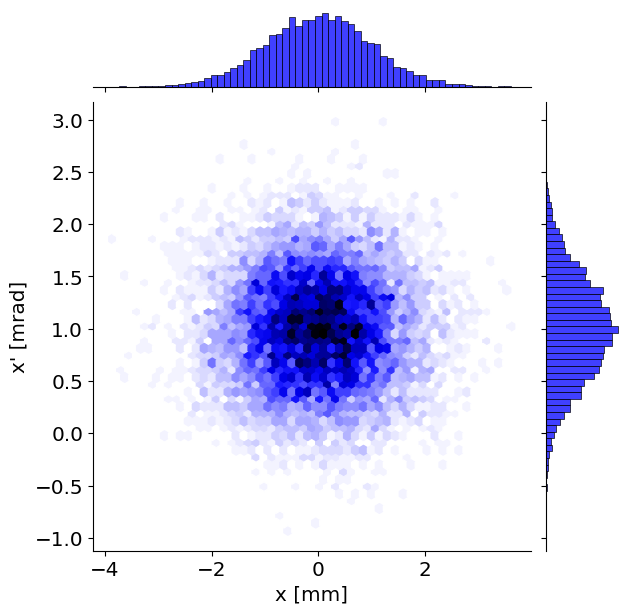

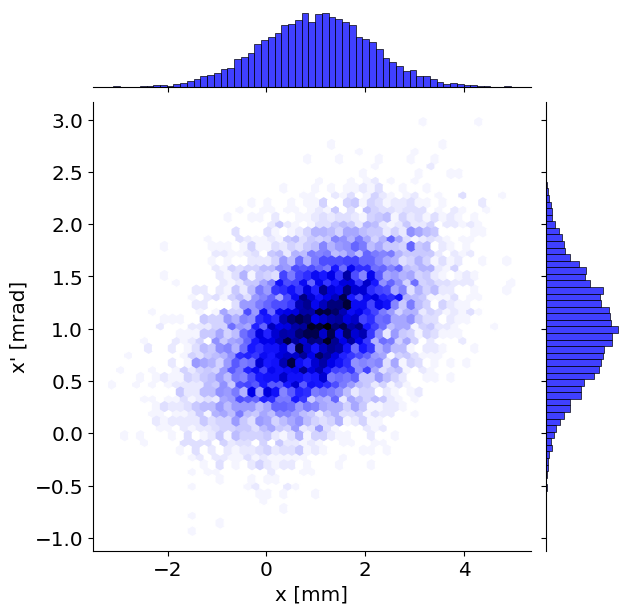

In [3]:
# code here your solution...
Npart = 10000
beam = np.random.randn(2, Npart)
x0 = 0
xp0 = 1
sigx = 1
sigxp = 0.5
beam[0,:] = sigx*beam[0,:]+x0
beam[1,:] = sigxp*beam[1,:]+xp0

beam_after_drift = D(1)[0]['matrix'] @ np.array(beam)

# Before the drift
g = sns.jointplot(x=beam[0,:], y=beam[1,:], kind="hex", color="b")
g.set_axis_labels("x [mm]", "x' [mrad]")
#g.savefig('before_drift.pdf')

# After the drift
g = sns.jointplot(x=beam_after_drift[0,:], y=beam_after_drift[1,:],
                  kind="hex", color="b")
g.set_axis_labels("x [mm]", "x' [mrad]")
#g.savefig('after_drift.pdf')

> **Note that the distribution in phase space is now a "tilted" ellipse!**

#### SOLUTION - test of linearity

In [4]:
# code here your solution...
month_birthday = 3
v1 = D(1)[0]['matrix']@(17*month_birthday*beam)
v2 = 17*month_birthday*D(1)[0]['matrix']@(beam)

# this might return False due to machine precision rounding - See **Computational tools** course!:
print(np.array_equal(v1,v2))
# let's compare at the level of 10 times epsilon, times the scaling factor used for the test
print(np.max(np.abs(v1-v2)) < 10*17*month_birthday*np.finfo(v1.dtype).eps)

True
True


#### SOLUTION - area preservation

Now let us consider three points of the distributions and let us verify that the area of the triangle before and after the transoformation is preserved.

**IMPORTANT**: the area preservation is a condition stronger than the linearity. It is possible only for special matrices, the so-called symplectic matrices.
A $2\times2$ matrix is symplectic if and only if its determinant is one.

In [5]:
# this is the formula of the area of a triangle
from numpy.linalg import norm
def area(a, b, c) :
    '''a,b,c are the phase-space coordinates of three particles'''
    return 0.5 * norm( np.cross( b-a, c-a ) )

In [6]:
# code here your solution...
# we take the first three particles in the beam (arbitrary choise)
print(f"Before transport {area(beam[:,0],beam[:,1],beam[:,2])}")
print(f"After transport {area(beam_after_drift[:,0],beam_after_drift[:,1],beam_after_drift[:,2])}")

Before transport 0.2154967558692127
After transport 0.21549675586921263


/var/folders/6m/1nl4293j1rvdzdp_8pn3bjcw0000gn/T/ipykernel_8848/399865987.py:5: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  return 0.5 * norm( np.cross( b-a, c-a ) )


We can visualise this in a plot:

Text(0.5, 1.0, 'Exercise 13')

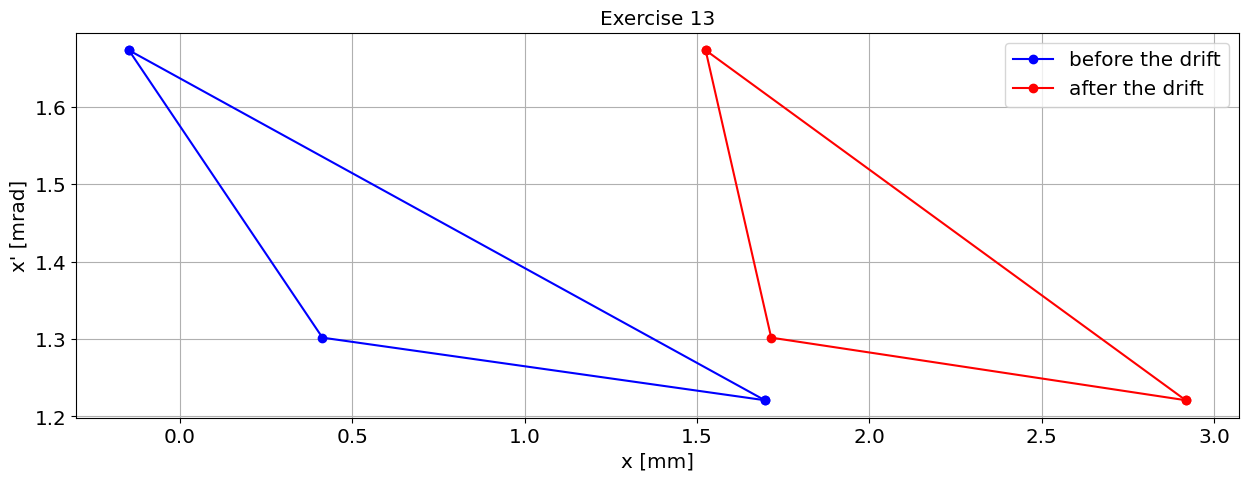

In [7]:
#first triangle
plt.plot(beam[:,:3][0],beam[:,:3][1],'o-b')
plt.plot(beam[:,[2,0]][0],beam[:,[2,0]][1],'o-b', label='before the drift')

#second triangle
plt.plot(beam_after_drift[:,:3][0],beam_after_drift[:,:3][1],'o-r')
plt.plot(beam_after_drift[:,[2,0]][0],beam_after_drift[:,[2,0]][1],'o-r',label='after the drift')

plt.legend()
plt.xlabel('x [mm]')
plt.ylabel("x' [mrad]")
plt.grid(True)
plt.title('Exercise 13')